In [1]:
%run ./1_Definitions.ipynb

2020-01-08 15:02:54.037541
thunder  Wed Jan  8 15:02:54 2020
[0] GeForce GTX 1080 Ti | 40'C,   0 % |    10 / 11178 MB |
[1] GeForce GTX 1080 Ti | 25'C,   0 % |    10 / 11178 MB |
[2] GeForce GTX 1080 Ti | 26'C,   0 % |    10 / 11178 MB |
[3] GeForce GTX 1080 Ti | 25'C,   0 % |    10 / 11178 MB |
[4] GeForce GTX 1080 Ti | 23'C,   0 % |    10 / 11178 MB |
[5] GeForce GTX 1080 Ti | 26'C,   0 % |    10 / 11178 MB |
[6] GeForce GTX 1080 Ti | 29'C,   0 % |    10 / 11178 MB |
[7] GeForce GTX 1080 Ti | 28'C,   0 % |    10 / 11178 MB |


/ds/environments/python2020/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.
/ds/environments/python2020/lib/python3.7/site-packages/keras/callbacks/callbacks.py:19: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


Dataset consist of 85730 patients data with 6251 features for each patient
Function definitions executed
Definitions DONE !!



In [2]:
!nvidia-smi
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # so the IDs match nvidia-smi
os.environ["CUDA_VISIBLE_DEVICES"] = "0"   # choose here your GPU (0-7)

import tensorflow as tf
import tensorflow.compat.v1 as tf
import keras
# from keras import backend as K
import tensorflow.python.keras.backend as K

Wed Jan  8 15:03:06 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.01    Driver Version: 418.87.01    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:04:00.0 Off |                  N/A |
| 29%   40C    P0    59W / 250W |     10MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:06:00.0 Off |                  N/A |
| 29%   25C    P8     7W / 250W |     10MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [3]:
img_size = 250
red_size = 224

srcpath = '/ds2/data/retina/UK_BB/UK_BB_DATA/fundus/'
funduspath_CR = DATA_dir + 'Fundus_images_250_CR/'
trainpath = funduspath_CR + 'train/'
valpath = funduspath_CR + 'val/'
testpath = funduspath_CR + 'test/'

## Loading metadata

In [4]:
# LOAD
meta_train = pd.read_pickle(tts_path + '40_features_union_train_df_FINAL.pkl')
meta_val = pd.read_pickle(tts_path + '40_features_union_val_df_FINAL.pkl')
meta_test = pd.read_pickle(tts_path + '40_features_union_test_df_FINAL.pkl')
meta_train.shape, meta_val.shape, meta_test.shape

((51438, 444), (17146, 444), (17146, 444))

## Loading Fundus Image data (names)

In [5]:
img_train = pd.read_pickle(funduspath_CR + 'valid_traindf_names.pkl')
img_val = pd.read_pickle(funduspath_CR + 'valid_valdf_names.pkl')
img_test = pd.read_pickle(funduspath_CR + 'valid_testdf_names.pkl')

img_train.shape , img_val.shape , img_test.shape

((101834, 5), (33943, 5), (33936, 5))

## Loading Ground truth

In [6]:
# LOAD
y_train = pd.read_pickle(tts_path + 'yu_train.pkl')
y_val = pd.read_pickle(tts_path + 'yu_val.pkl')
y_test = pd.read_pickle(tts_path + 'yu_test.pkl')

In [8]:
y_train.shape, y_val.shape,y_test.shape

((51438, 1), (17146, 1), (17146, 1))

## Loading CNN predictions

In [10]:
cnn_pred_tr = np.load(funduspath_CR + '200ep_train_M7_latest.npy')
cnn_pred_val = np.load(funduspath_CR + '200ep_val_M7_latest.npy')
cnn_pred_test = np.load(funduspath_CR + '200ep_test_M7_latest.npy')

In [11]:
cnn_pred_tr.shape, cnn_pred_val.shape, cnn_pred_test.shape

((101834, 1), (33943, 1), (33936, 1))

## Creating left and right image names for train-test-val set using indices

In [12]:
indices_train = np.load(tts_path + 'indices_train.npy')
indices_val = np.load(tts_path + 'indices_val.npy')
indices_test = np.load(tts_path + 'indices_test.npy')

indices_train.shape, indices_val.shape, indices_test.shape

((51438,), (17146,), (17146,))

Below code is commented out as the left and right images were created and saved successfully

In [13]:
# left_train=[] 
# right_train=[] 
# left_val=[] 
# right_val=[] 
# left_test=[] 
# right_test=[]

# for i in indices_train:
#     left_train.append(get_img_name(i,df_fundus_left))
#     right_train.append(get_img_name(i,df_fundus_right))
# print("Done-Train")

# for i in indices_val:
#     left_val.append(get_img_name(i,df_fundus_left))
#     right_val.append(get_img_name(i,df_fundus_right))
# print("Done-Val")

# for i in indices_test:
#     left_test.append(get_img_name(i,df_fundus_left))
#     right_test.append(get_img_name(i,df_fundus_right))
# print("Done-Test")

# len(left_train), len(right_train), len(left_val), len(right_val), len(left_test), len(right_test)

## Saving

In [14]:
# np.save(tts_path + 'left_train.npy', left_train)
# np.save(tts_path + 'right_train.npy', right_train)

# np.save(tts_path + 'left_val.npy', left_val)
# np.save(tts_path + 'right_val.npy', right_val)

# np.save(tts_path + 'left_test.npy', left_test)
# np.save(tts_path + 'right_test.npy', right_test)

## Loading 

In [15]:
left_train = np.load(tts_path + 'left_train.npy')
right_train = np.load(tts_path + 'right_train.npy')

left_val = np.load(tts_path + 'left_val.npy', )
right_val = np.load(tts_path + 'right_val.npy')

left_test = np.load(tts_path + 'left_test.npy')
right_test = np.load(tts_path + 'right_test.npy')

In [16]:
len(left_train), len(right_train), len(left_val), len(right_val), len(left_test), len(right_test)

(51438, 51438, 17146, 17146, 17146, 17146)

## Creating dictionary of fundus image_names with its predictions from CNN model

In [17]:
pdict_train = dict(zip(img_train['Fundus_Filenames'], cnn_pred_tr)) 
pdict_val = dict(zip(img_val['Fundus_Filenames'], cnn_pred_val)) 
pdict_test = dict(zip(img_test['Fundus_Filenames'], cnn_pred_test)) 

In [18]:
cnn_pred_tr.shape, cnn_pred_val.shape, cnn_pred_test.shape

((101834, 1), (33943, 1), (33936, 1))

## Creating prediction columns - patient wise

#### TRAIN

In [19]:
# Prediction lists for each patient to include in the meta-data list for RandomForestClassifier
left_pred_train = []
right_pred_train = []
missing_pred_train = []
for i in range(len(meta_train)):
    
    patient_num = indices_train[i]
    left_eye = left_train[i]
    right_eye = right_train[i]

    # Predictions are considered, only if present for both eyes. Any one image missing, we remove the patient itself.
    if left_eye in pdict_train and right_eye in pdict_train:
        left_pred_train.append(pdict_train[left_eye])
        right_pred_train.append(pdict_train[right_eye])    
    else:
        missing_pred_train.append(i)
        
print("No. of patients whose any prediction was not found in train set is:",len(missing_pred_train))

No. of patients whose any prediction was not found in train set is: 1041


In [20]:
len(left_pred_train), len(right_pred_train)

(50397, 50397)

#### VALIDATION

In [21]:
# Prediction lists for each patient to include in the meta-data list for RandomForestClassifier
left_pred_val = []
right_pred_val = []
missing_pred_val = []
for i in range(len(meta_val)):
    
    patient_num = indices_val[i]
    left_eye = left_val[i]
    right_eye = right_val[i]

    # Predictions are considered, only if present for both eyes. Any one image missing, we remove the patient itself.
    if left_eye in pdict_val and right_eye in pdict_val:
        left_pred_val.append(pdict_val[left_eye])
        right_pred_val.append(pdict_val[right_eye])    
    else:
        missing_pred_val.append(i)
        
print("No. of patients whose any prediction was not found in validation set is:",len(missing_pred_val))

No. of patients whose any prediction was not found in validation set is: 349


In [22]:
len(left_pred_val), len(right_pred_val)

(16797, 16797)

#### TEST

In [23]:
# Prediction lists for each patient to include in the meta-data list for RandomForestClassifier
left_pred_test = []
right_pred_test = []
missing_pred_test = []
for i in range(len(meta_test)):
    
    patient_num = indices_test[i]
    left_eye = left_test[i]
    right_eye = right_test[i]

    # Predictions are considered, only if present for both eyes. Any one image missing, we remove the patient itself.
    if left_eye in pdict_test and right_eye in pdict_test:
        left_pred_test.append(pdict_test[left_eye])
        right_pred_test.append(pdict_test[right_eye])    
    else:
        missing_pred_test.append(i)
        
print("No. of patients whose any prediction was not found in test set is:",len(missing_pred_test))

No. of patients whose any prediction was not found in test set is: 356


In [24]:
len(left_pred_test), len(right_pred_test)

(16790, 16790)

## Removing patients from meta data list and respective ground truth
For some patients the meta data records were available but fundus images of either left or right eyes were missing due to several reasons like poor quality image, eye not scanned, etc.Such records were removed for multimodal model.

New meta data and ground truth were  created for the patients along with their respective left and right eye images.

In [25]:
new_meta_train = meta_train.drop(meta_train.index[missing_pred_train], inplace=False)
new_meta_val = meta_val.drop(meta_val.index[missing_pred_val], inplace=False)
new_meta_test = meta_test.drop(meta_test.index[missing_pred_test], inplace=False)

new_meta_train.shape, new_meta_val.shape, new_meta_test.shape

((50397, 444), (16797, 444), (16790, 444))

In [26]:
new_y_train = y_train.drop(y_train.index[missing_pred_train], inplace=False)
new_y_val = y_val.drop(y_val.index[missing_pred_val], inplace=False)
new_y_test = y_test.drop(y_test.index[missing_pred_test], inplace=False)

new_y_train.shape, new_y_val.shape, new_y_test.shape

((50397, 1), (16797, 1), (16790, 1))

## Concat metadata with predictions of cnn

In [27]:
new_meta_train['Prediction_L'] = left_pred_train
new_meta_train['Prediction_R'] = right_pred_train

In [28]:
new_meta_val['Prediction_L'] = left_pred_val
new_meta_val['Prediction_R'] = right_pred_val

In [29]:
new_meta_test['Prediction_L'] = left_pred_test
new_meta_test['Prediction_R'] = right_pred_test

In [30]:
new_meta_train.shape, new_meta_val.shape, new_meta_test.shape

((50397, 446), (16797, 446), (16790, 446))

## Creating Dataframe with Left and Right Predictions of CNN only

In [31]:
CNN_pred_train_df = pd.DataFrame({'Prediction_L': left_pred_train, 'Prediction_R': right_pred_train})
CNN_pred_val_df = pd.DataFrame({'Prediction_L': left_pred_val, 'Prediction_R': right_pred_val})
CNN_pred_test_df = pd.DataFrame({'Prediction_L': left_pred_test, 'Prediction_R': right_pred_test})

In [32]:
CNN_pred_train_df.shape, CNN_pred_val_df.shape, CNN_pred_test_df.shape

((50397, 2), (16797, 2), (16790, 2))

## RandomForestClassifier with new data

In [33]:
np.where(new_y_train==1)[0].shape, np.where(new_y_train==0)[0].shape

((2414,), (47983,))

In [34]:
# Adding Class weight as per above imabalnce ratio
class_weight={0:1,1:20}

In [35]:
RFC = RandomForestClassifier(bootstrap=True,
                            class_weight=class_weight, criterion='gini',
                            max_depth=8, max_features='auto', max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=4, min_samples_split=10,
                            min_weight_fraction_leaf=0.0, n_estimators=300,
                            n_jobs=-1, oob_score=True,
                            verbose=0, warm_start=False)

RFC.fit(new_meta_train, new_y_train)

/ds/environments/python2020/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 20},
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=-1, oob_score=True,
                       random_state=None, verbose=0, warm_start=False)

## Performance of Classfier

In [36]:
rfc_pred_train = RFC.predict(new_meta_train)
rfc_pred_val = RFC.predict(new_meta_val)
rfc_pred_test = RFC.predict(new_meta_test)

In [37]:
print("Metrics:\t\tTrain:\t\t\tValidation:\t\tTest:")
print("Accuracy:\t",accuracy_score(new_y_train, rfc_pred_train), "\t", accuracy_score(new_y_val, rfc_pred_val), "\t", accuracy_score(new_y_test, rfc_pred_test))
print("Recall:\t\t",recall_score(new_y_train, rfc_pred_train), "\t", recall_score(new_y_val, rfc_pred_val), "\t", recall_score(new_y_test, rfc_pred_test))
print("Precision:\t",precision_score(new_y_train, rfc_pred_train), "\t", precision_score(new_y_val, rfc_pred_val), "\t", precision_score(new_y_test, rfc_pred_test))
print("F1 score:\t",f1_score(new_y_train, rfc_pred_train), "\t", f1_score(new_y_val, rfc_pred_val), "\t", f1_score(new_y_test, rfc_pred_test))
fpr_train, tpr_train, thresholds_train = roc_curve(new_y_train, rfc_pred_train)
fpr_val, tpr_val, thresholds_val = roc_curve(new_y_val, rfc_pred_val)
fpr_test, tpr_test, thresholds_test = roc_curve(new_y_test, rfc_pred_test)
print("AUC:\t\t",auc(fpr_train, tpr_train), "\t", auc(fpr_val, tpr_val), "\t", auc(fpr_test, tpr_test))


Metrics:		Train:			Validation:		Test:
Accuracy:	 0.8307438934857233 	 0.8060963267250104 	 0.8057176891006551
Recall:		 0.7149958574979287 	 0.4109090909090909 	 0.3875
Precision:	 0.18039297658862877 	 0.1090032154340836 	 0.10058403634003893
F1 score:	 0.2880988148890002 	 0.17229987293519694 	 0.15971148892323545
AUC:		 0.7757814875093586 	 0.618708990733784 	 0.6070708255159475


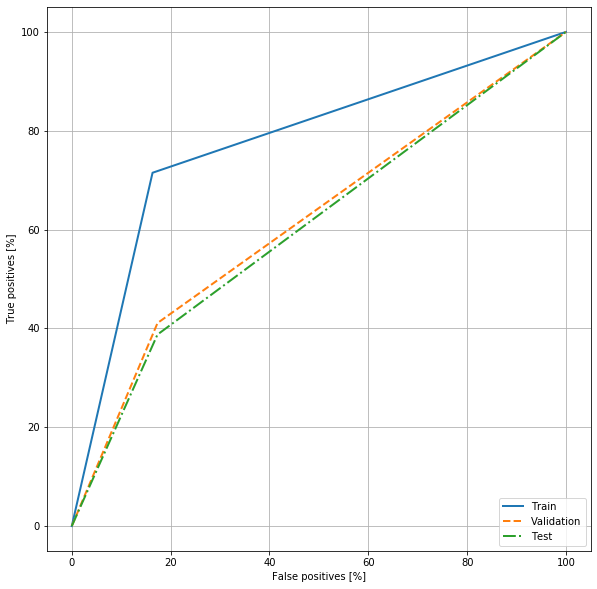

In [38]:
plt.figure(figsize=(10,10))
plot_roc("Train", new_y_train, rfc_pred_train, color=colors[0])
plot_roc("Validation", new_y_val, rfc_pred_val, color=colors[1],linestyle='--')
plot_roc("Test", new_y_test, rfc_pred_test, color=colors[2],linestyle='-.')
plt.legend(loc='lower right')

In [39]:
print(classification_report(new_y_train, rfc_pred_train) ,"\n\n", classification_report(new_y_val, rfc_pred_val),
     "\n\n", classification_report(new_y_test, rfc_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90     47983
           1       0.18      0.71      0.29      2414

    accuracy                           0.83     50397
   macro avg       0.58      0.78      0.60     50397
weighted avg       0.94      0.83      0.87     50397
 

               precision    recall  f1-score   support

           0       0.96      0.83      0.89     15972
           1       0.11      0.41      0.17       825

    accuracy                           0.81     16797
   macro avg       0.54      0.62      0.53     16797
weighted avg       0.92      0.81      0.85     16797
 

               precision    recall  f1-score   support

           0       0.96      0.83      0.89     15990
           1       0.10      0.39      0.16       800

    accuracy                           0.81     16790
   macro avg       0.53      0.61      0.52     16790
weighted avg       0.92      0.81      0.86     16790



In [40]:
print(confusion_matrix(new_y_train, rfc_pred_train) ,"\n\n", confusion_matrix(new_y_val, rfc_pred_val),
      "\n\n", confusion_matrix(new_y_test, rfc_pred_test))

[[40141  7842]
 [  688  1726]] 

 [[13201  2771]
 [  486   339]] 

 [[13218  2772]
 [  490   310]]


Healthy Patients - correctly identified (True Negatives):  40141 0.8365671175207886
Healthy Patients - predicted to have glaucoma (False Positives):  7842 0.1634328824792114
Glaucoma Patients - predicted healthy (False Negatives):  688 0.28500414250207123
Glaucoma Patients - correctly identified (True Positives):  1726 0.7149958574979287

Total Glaucoma patients:  2414 1.0
Total Healthy patients:  47983 1.0


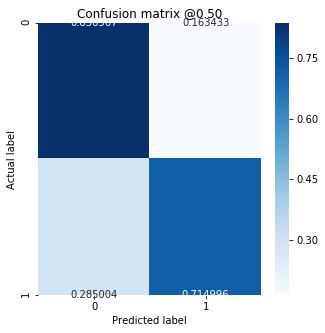

In [41]:
plot_cm(new_y_train, rfc_pred_train)

Healthy Patients - correctly identified (True Negatives):  13201 0.8265088905584773
Healthy Patients - predicted to have glaucoma (False Positives):  2771 0.17349110944152266
Glaucoma Patients - predicted healthy (False Negatives):  486 0.5890909090909091
Glaucoma Patients - correctly identified (True Positives):  339 0.4109090909090909

Total Glaucoma patients:  825 1.0
Total Healthy patients:  15972 1.0


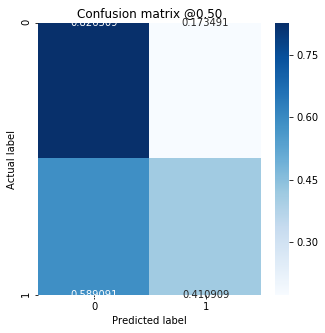

In [42]:
plot_cm(new_y_val, rfc_pred_val)

Healthy Patients - correctly identified (True Negatives):  13218 0.8266416510318949
Healthy Patients - predicted to have glaucoma (False Positives):  2772 0.17335834896810506
Glaucoma Patients - predicted healthy (False Negatives):  490 0.6125
Glaucoma Patients - correctly identified (True Positives):  310 0.3875

Total Glaucoma patients:  800 1.0
Total Healthy patients:  15990 1.0


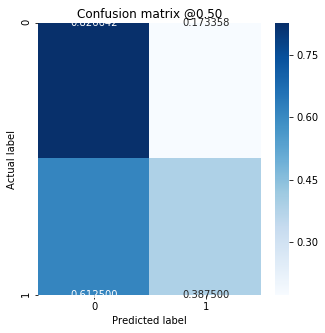

In [43]:
plot_cm(new_y_test, rfc_pred_test)

## Comparing to Performance of multimodal to performance of CNN only

In [44]:
len(new_y_train), len(new_y_val), len(new_y_test), len(rfc_pred_train), len(rfc_pred_val), len(rfc_pred_test)

(50397, 16797, 16790, 50397, 16797, 16790)

In [45]:
len(left_pred_train), len(right_pred_train), len(left_pred_val), len(right_pred_val), len(left_pred_test), len(right_pred_test)

(50397, 50397, 16797, 16797, 16790, 16790)

## (1) Manually checking 

In [46]:
cnn_pred_train=np.zeros((len(new_y_train)))
cnn_pred_val=np.zeros((len(new_y_val)))
cnn_pred_test=np.zeros((len(new_y_test)))

# Manually checking- If any one eye has glaucoma, then patient has glaucoma.
for i in range(len(new_y_train)):
    if(left_pred_train[i][0] > 0.5 or right_pred_train[i][0] > 0.5):
        cnn_pred_train[i] = 1
        
for i in range(len(new_y_val)):
    if(left_pred_val[i][0] > 0.5 or right_pred_val[i][0] > 0.5):
        cnn_pred_val[i] = 1
        
for i in range(len(new_y_test)):
    if(left_pred_test[i][0] > 0.5 or right_pred_test[i][0] > 0.5):
        cnn_pred_test[i] = 1

In [47]:
get_metrics(new_y_train, new_y_val, new_y_test, cnn_pred_train, cnn_pred_val, cnn_pred_test)

Metrics:		Train:			Validation:		Test:
Accuracy:	 0.17709387463539497 	 0.3501815800440555 	 0.34806432400238235
Recall:		 0.8562551781275891 	 0.6581818181818182 	 0.66125
Precision:	 0.0478560844600852 	 0.04858625626342162 	 0.04721528025705105
F1 score:	 0.09064596763583739 	 0.09049245896175319 	 0.08813728757080973
AUC:		 0.49959039880891265 	 0.49622714750813923 	 0.49682262351469664


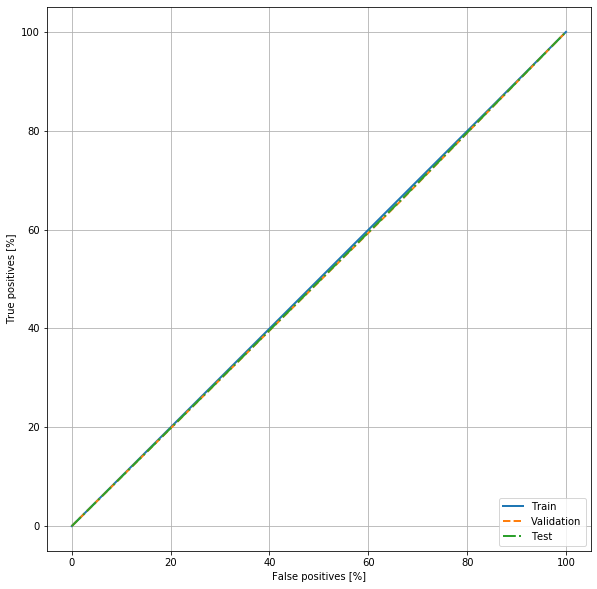

In [48]:
plt.figure(figsize=(10,10))
plot_roc("Train", new_y_train, cnn_pred_train, color=colors[0])
plot_roc("Validation", new_y_val, cnn_pred_val, color=colors[1],linestyle='--')
plot_roc("Test", new_y_test, cnn_pred_test, color=colors[2],linestyle='-.')
plt.legend(loc='lower right')

Healthy Patients - correctly identified (True Negatives):  6858 0.14292561949023613
Healthy Patients - predicted to have glaucoma (False Positives):  41125 0.8570743805097639
Glaucoma Patients - predicted healthy (False Negatives):  347 0.14374482187241094
Glaucoma Patients - correctly identified (True Positives):  2067 0.8562551781275891

Total Glaucoma patients:  2414 1.0
Total Healthy patients:  47983 1.0


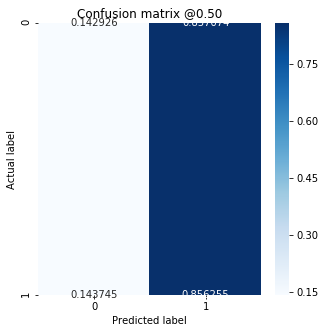

In [49]:
plot_cm(new_y_train, cnn_pred_train)

Healthy Patients - correctly identified (True Negatives):  5339 0.3342724768344603
Healthy Patients - predicted to have glaucoma (False Positives):  10633 0.6657275231655397
Glaucoma Patients - predicted healthy (False Negatives):  282 0.3418181818181818
Glaucoma Patients - correctly identified (True Positives):  543 0.6581818181818182

Total Glaucoma patients:  825 1.0
Total Healthy patients:  15972 1.0


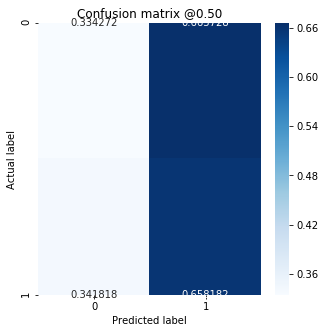

In [50]:
plot_cm(new_y_val, cnn_pred_val)

Healthy Patients - correctly identified (True Negatives):  5315 0.3323952470293934
Healthy Patients - predicted to have glaucoma (False Positives):  10675 0.6676047529706066
Glaucoma Patients - predicted healthy (False Negatives):  271 0.33875
Glaucoma Patients - correctly identified (True Positives):  529 0.66125

Total Glaucoma patients:  800 1.0
Total Healthy patients:  15990 1.0


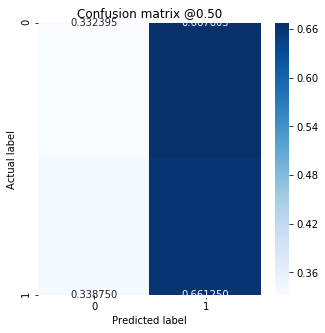

In [51]:
plot_cm(new_y_test, cnn_pred_test)

## (2) Random Forest with 2 predictions as input to get the CNN predictions on patient level.

In [52]:
RFC_cnnpred = RandomForestClassifier(bootstrap=True,
                            class_weight=class_weight, criterion='gini',
                            max_depth=8, max_features='auto', max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=4, min_samples_split=10,
                            min_weight_fraction_leaf=0.0, n_estimators=300,
                            n_jobs=-1, oob_score=True,
                            verbose=0, warm_start=False)
RFC_cnnpred.fit(CNN_pred_train_df, new_y_train)

/ds/environments/python2020/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 20},
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=300, n_jobs=-1, oob_score=True,
                       random_state=None, verbose=0, warm_start=False)

In [53]:
cnn_pred_train_2 = RFC_cnnpred.predict(CNN_pred_train_df)
cnn_pred_val_2 = RFC_cnnpred.predict(CNN_pred_val_df)
cnn_pred_test_2 = RFC_cnnpred.predict(CNN_pred_test_df)

In [54]:
get_metrics(new_y_train, new_y_val, new_y_test, cnn_pred_train_2, cnn_pred_val_2, cnn_pred_test_2)

Metrics:		Train:			Validation:		Test:
Accuracy:	 0.8088378276484711 	 0.82169435018158 	 0.8178082191780822
Recall:		 0.5136702568351285 	 0.13696969696969696 	 0.1525
Precision:	 0.12783505154639174 	 0.04716193656093489 	 0.04874151018777467
F1 score:	 0.2047218094766386 	 0.07016454517230673 	 0.07387223735997578
AUC:		 0.6686789064222743 	 0.4970160280490859 	 0.5017972170106316


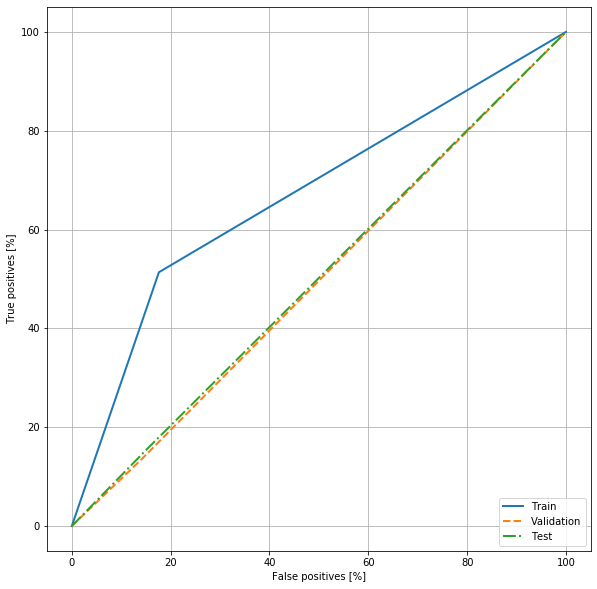

In [55]:
plt.figure(figsize=(10,10))
plot_roc("Train", new_y_train, cnn_pred_train_2, color=colors[0])
plot_roc("Validation", new_y_val, cnn_pred_val_2, color=colors[1],linestyle='--')
plot_roc("Test", new_y_test, cnn_pred_test_2, color=colors[2],linestyle='-.')
plt.legend(loc='lower right')

Healthy Patients - correctly identified (True Negatives):  39523 0.82368755600942
Healthy Patients - predicted to have glaucoma (False Positives):  8460 0.17631244399058
Glaucoma Patients - predicted healthy (False Negatives):  1174 0.4863297431648716
Glaucoma Patients - correctly identified (True Positives):  1240 0.5136702568351285

Total Glaucoma patients:  2414 1.0
Total Healthy patients:  47983 1.0


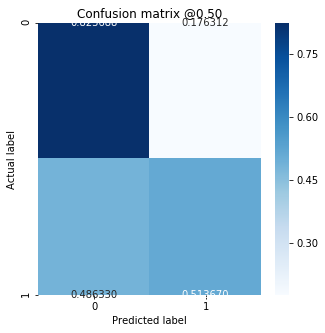

In [56]:
plot_cm(new_y_train, cnn_pred_train_2)

Healthy Patients - correctly identified (True Negatives):  13689 0.8570623591284748
Healthy Patients - predicted to have glaucoma (False Positives):  2283 0.14293764087152516
Glaucoma Patients - predicted healthy (False Negatives):  712 0.863030303030303
Glaucoma Patients - correctly identified (True Positives):  113 0.13696969696969696

Total Glaucoma patients:  825 1.0
Total Healthy patients:  15972 1.0


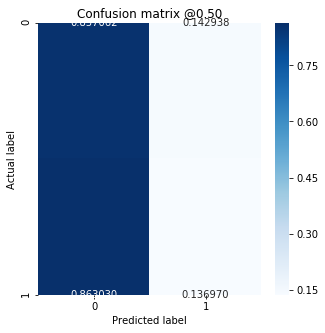

In [57]:
plot_cm(new_y_val, cnn_pred_val_2)

Healthy Patients - correctly identified (True Negatives):  13609 0.8510944340212633
Healthy Patients - predicted to have glaucoma (False Positives):  2381 0.14890556597873672
Glaucoma Patients - predicted healthy (False Negatives):  678 0.8475
Glaucoma Patients - correctly identified (True Positives):  122 0.1525

Total Glaucoma patients:  800 1.0
Total Healthy patients:  15990 1.0


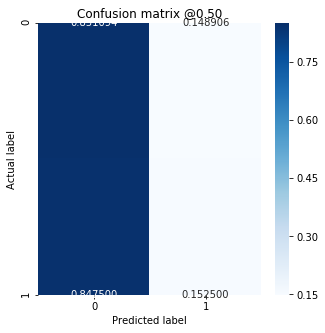

In [59]:
plot_cm(new_y_test, cnn_pred_test_2)

## Feature Importance with CNN predictions included

In [145]:
meta_df = new_meta_train.copy()
meta_df = meta_df.rename(columns={"Prediction_L": "Prediction_L-", "Prediction_R": "Prediction_R-"})

In [146]:
# FEATURE DESCRIPTION DICTIONARY
feat_desc = pd.read_excel(DATA_dir + 'FeatureNames.xlsx')
feat_unique = feat_desc['UDI'].str.split('-',expand=True)[0].unique()
feat_unique = np.insert(feat_unique,-1 , 'Prediction_L')
feat_unique = np.insert(feat_unique,-1 , 'Prediction_R')
feat_desc_dict, feat_unique_dict = feature_desc()
feat_unique_dict['Prediction_L'] = "Left eye Predictions"
feat_unique_dict['Prediction_R'] = "Right eye Predictions"

In [148]:
feat_imp_dict, feat_unique_imp_dict = feature_imp(RFC, meta_df)
fi_red = get_imp_features(50)
display_all(fi_red)

,Features,Importance
0,Taking other prescription medications,0.040458
1,Year of birth,0.031898
2,"Intra-ocular pressure, corneal-compensated (ri...",0.030673
3,"Intra-ocular pressure, Goldmann-correlated (ri...",0.029914
4,"Intra-ocular pressure, Goldmann-correlated (left)",0.029398
5,Age when attended assessment centre,0.028961
6,Overall health rating,0.017985
7,Number of days/week of vigorous physical activ...,0.015744
8,Time since interview start at which blood pres...,0.013961
9,Duration visual-acuity screen displayed (right),0.012405


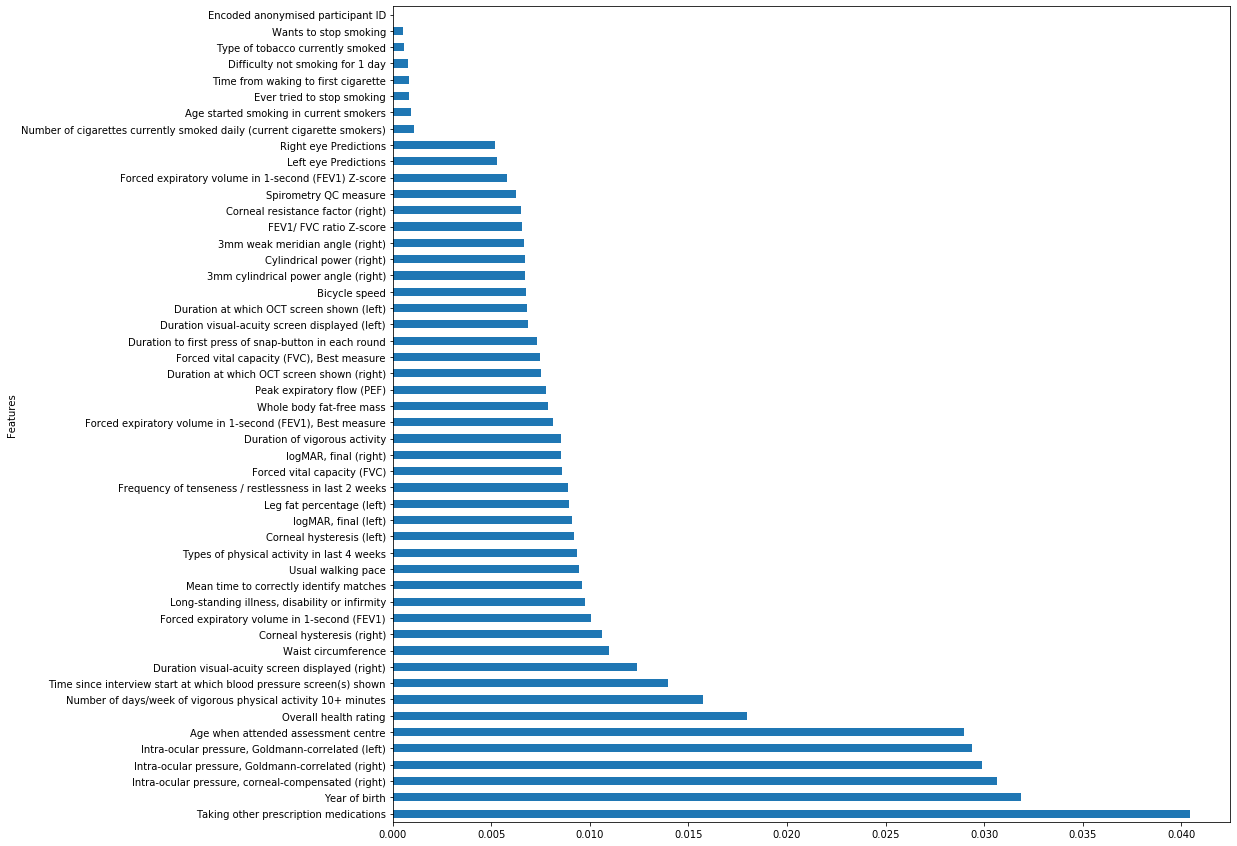

In [149]:
plot_fi(fi_red)